In [23]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve

In [24]:
df = pd.read_csv('fashion-mnist_train.csv')
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
sample = df.sample(10000, random_state=42)
sample

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
12628,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37730,8,0,0,0,0,0,0,0,0,0,...,187,190,196,201,209,221,218,211,102,0
39991,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8525,5,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8279,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36675,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19487,4,0,0,0,0,0,0,0,0,0,...,0,4,0,32,178,178,135,0,0,0
3256,8,0,0,0,0,0,0,0,0,0,...,147,145,130,120,142,43,0,0,0,0
14474,8,0,0,0,0,0,0,0,0,0,...,0,0,12,14,9,28,69,31,0,0


In [26]:
X = sample.drop('label', axis=1)
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
12628,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37730,0,0,0,0,0,0,0,0,0,0,...,187,190,196,201,209,221,218,211,102,0
39991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8525,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36675,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19487,0,0,0,0,0,0,0,0,0,0,...,0,4,0,32,178,178,135,0,0,0
3256,0,0,0,0,0,0,0,0,0,0,...,147,145,130,120,142,43,0,0,0,0
14474,0,0,0,0,0,0,0,0,0,0,...,0,0,12,14,9,28,69,31,0,0


In [27]:
y = sample.label
y

12628    7
37730    8
39991    8
8525     5
8279     9
        ..
36675    5
19487    4
3256     8
14474    8
41816    5
Name: label, Length: 10000, dtype: int64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [29]:
mlp = MLPClassifier(random_state=42).fit(X_train, y_train)


In [30]:
mlp.score(X_val, y_val)

0.803

0.9368333333333333


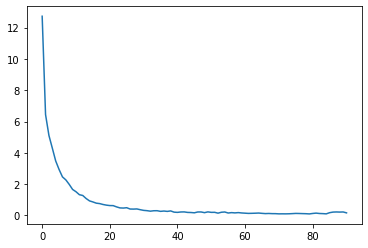

In [31]:
print (mlp.score(X_train,y_train))
plt.plot(mlp.loss_curve_)


In [35]:
lc = learning_curve(MLPClassifier(random_state=42), X_val, y_val)
lc

(array([ 160,  520,  880, 1240, 1600]),
 array([[1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 0.98461538, 0.98461538, 0.98461538],
        [0.98636364, 0.9375    , 1.        , 1.        , 1.        ],
        [0.95080645, 0.98225806, 0.98306452, 0.95725806, 0.95887097],
        [0.998125  , 1.        , 0.99      , 0.9625    , 0.97875   ]]),
 array([[0.58  , 0.63  , 0.645 , 0.645 , 0.635 ],
        [0.705 , 0.69  , 0.7125, 0.685 , 0.685 ],
        [0.73  , 0.7075, 0.77  , 0.745 , 0.695 ],
        [0.7525, 0.71  , 0.7725, 0.75  , 0.7275],
        [0.7625, 0.7225, 0.7725, 0.775 , 0.7125]]))